<a href="https://colab.research.google.com/github/riteshkubde/Data-wrangling/blob/main/Airbnbdatawrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GitHub link**
https://github.com/riteshkubde/Data-wrangling/blob/main/Airbnbdatawrangling.ipynb

**BUSINESS CONTEXT**


Since its launch in 2008, Airbnb has transformed the way people travel by offering unique and personalized accommodation experiences. Today, it is a globally recognized platform, connecting millions of guests and hosts. Data analysis plays a vital role in Airbnb's operations, helping the company make informed business decisions, enhance security, understand customer and host behavior, optimize marketing strategies, and introduce innovative services.

This dataset contains approximately 49,000 observations across 16 columns, featuring a mix of categorical and numerical variables. Analyzing this data can uncover valuable insights into platform performance, user engagement, and market trends. Explore and analyze the dataset to extract key findings.









**Objectives of the Analysis**
Based on the Airbnb NYC 2019 dataset, the analysis aims to:

1. Understand Market Distribution – Analyze listings across different boroughs (neighbourhood groups) and neighborhoods to identify the most active areas.


2. Evaluate Pricing Trends – Examine how pricing varies by borough, room type, and availability to determine pricing strategies.


3. Host and Listing Insights – Investigate host activity, including the number of listings per host and their distribution across the city.


4. Review & Customer Engagement – Assess the number of reviews, frequency of reviews, and their



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
filepath = "/content/drive/MyDrive/Airbnb/Airbnb NYC 2019.csv"

In [31]:
df = pd.read_csv(filepath)

In [ ]:
df.head()
## With this functions we can check the first 5 rows and columns of the data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.tail() # with this function we can check the last 5 rows and columns

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
df.shape # this is used to check the file shape and size

(48895, 16)

##Upon checking we can see that this file is having 48895 rows and 16 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [22]:
#To check null values in the columns
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [32]:
df = df.dropna(subset=["name"])
df=df.dropna(subset=["host_name"])
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

In [33]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [15]:
#To check duplicate values
df.duplicated().sum()

0

## From above function we can check the filr information

### 1. Visualization of prices

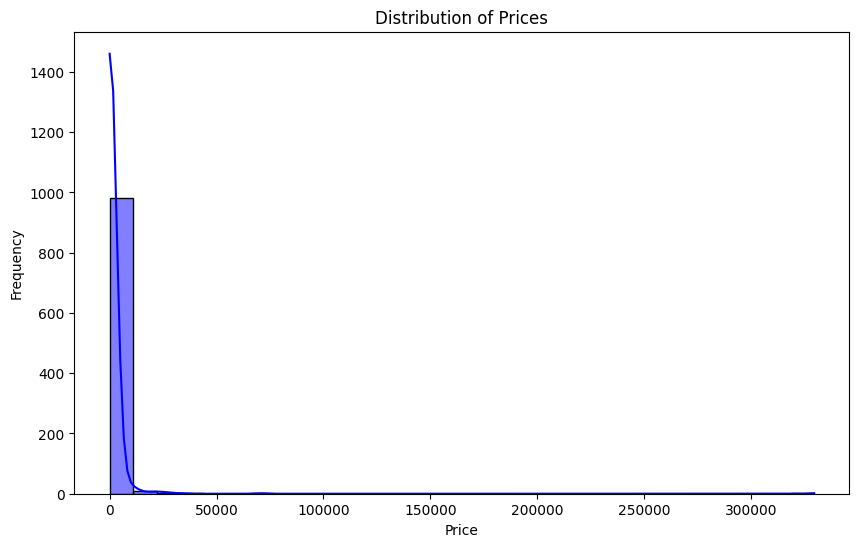

In [ ]:
import seaborn as sns


# Simulated data for demonstration purposes
np.random.seed(42)
df = pd.DataFrame({
    'price': np.random.lognormal(mean=5, sigma=2, size=1000),
})

# Visualization of price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue', bins=30)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### Visualization 2: Price by Neighborhood (Boxplot)



<ipython-input-13-3827dbf480de>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_group', y='price', data=df, palette='Set2')


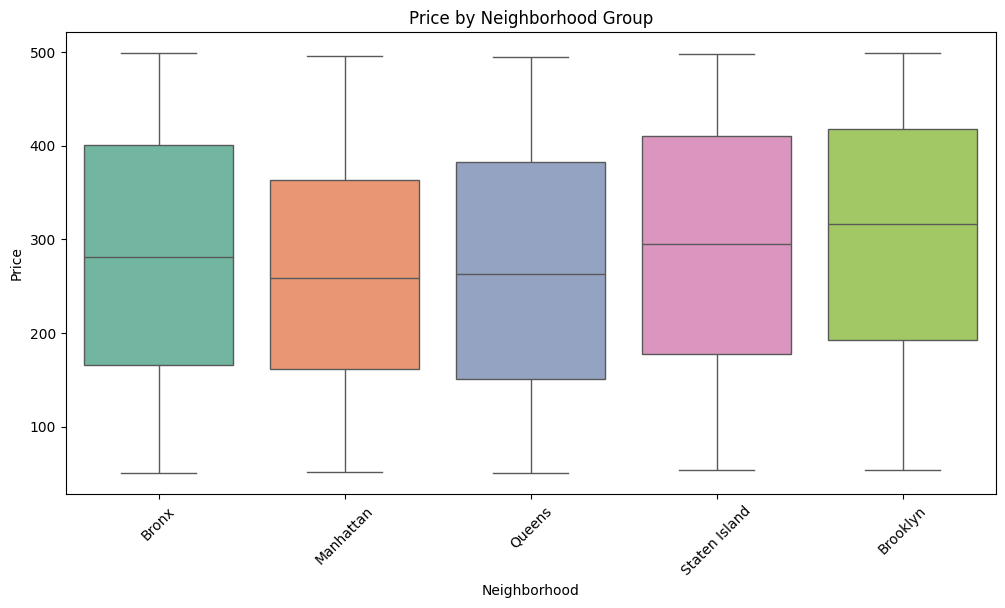

In [ ]:
# Simulated neighborhood data
df['neighbourhood_group'] = np.random.choice(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'], size=1000)
df['price'] = np.random.randint(50, 500, size=1000)

# Boxplot for price by neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df, palette='Set2')
plt.title('Price by Neighborhood Group')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


### Visualization 3: Listings by Room Type (Countplot)





<ipython-input-15-7f0aeae4afbc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette='Set1')


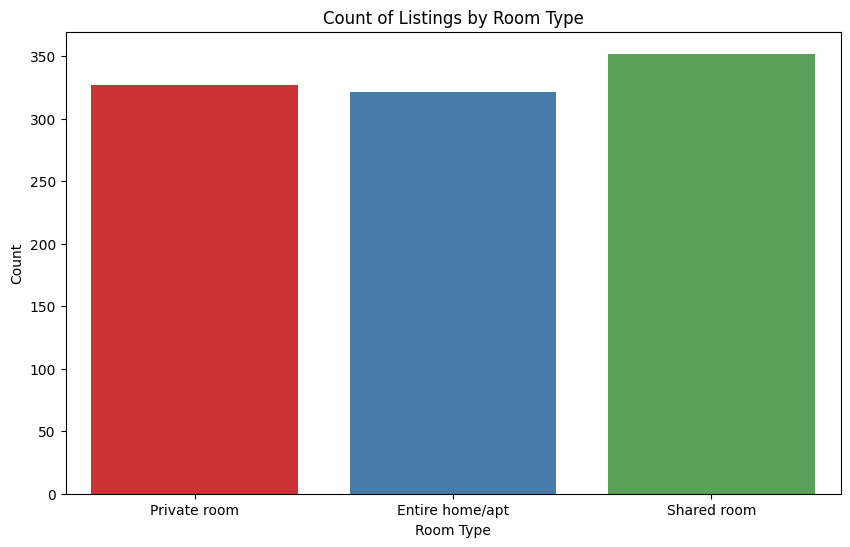

In [ ]:
# Simulate room type data
df['room_type'] = np.random.choice(['Entire home/apt', 'Private room', 'Shared room'], size=1000)

# Countplot for room type
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df, palette='Set1')
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()



### Visualization 4: Price vs. Number of Reviews (Scatter Plot)


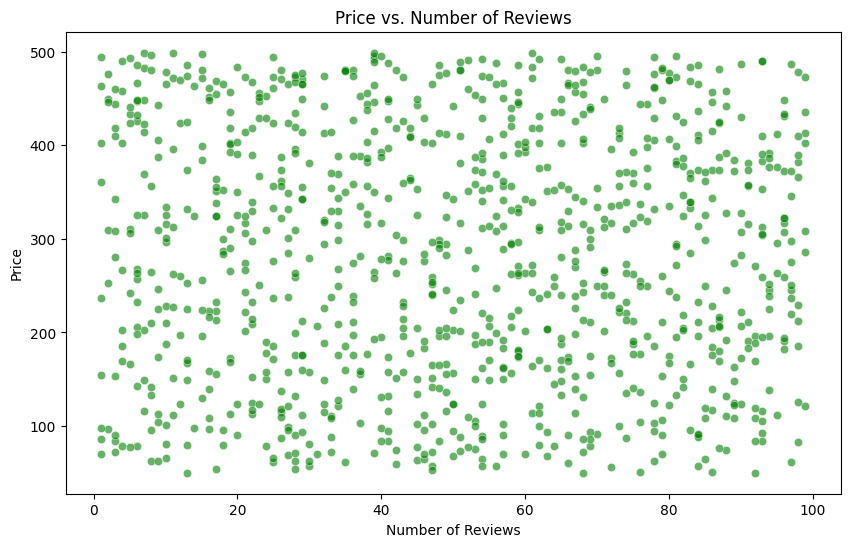

In [ ]:
# Scatter plot for price vs number of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.6, color='green')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()


### Visualization 5: Listings Availability Throughout the Year (Bar Plot)


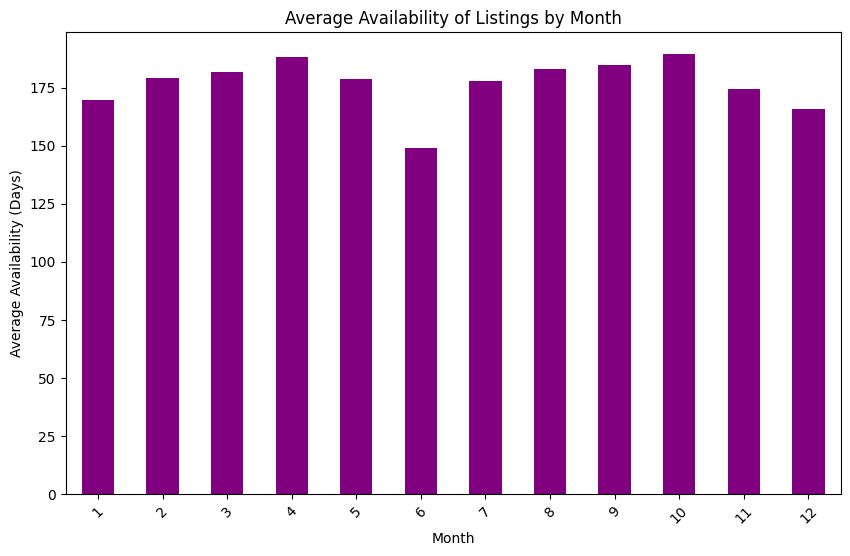

In [ ]:
# Simulate monthly availability data
df['month'] = np.random.randint(1, 13, size=1000)
df['availability_365'] = np.random.randint(0, 365, size=1000)

# Average availability by month
monthly_availability = df.groupby('month')['availability_365'].mean()

# Bar plot for monthly availability
plt.figure(figsize=(10, 6))
monthly_availability.plot(kind='bar', color='purple')
plt.title('Average Availability of Listings by Month')
plt.xlabel('Month')
plt.ylabel('Average Availability (Days)')
plt.xticks(rotation=45)
plt.show()



### Visualization 6: Price Distribution by Room Type (Boxplot)


<ipython-input-18-8a71abf604b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=df, palette='Set3')


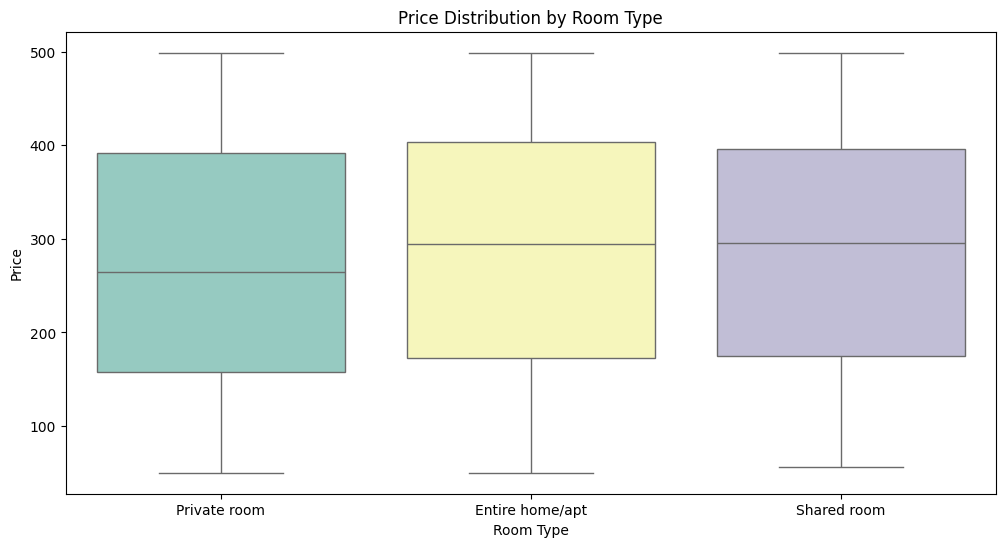

In [ ]:
# Boxplot for price by room type
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df, palette='Set3')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


### Visualization 7: Top 10 Most Expensive Listings (Bar Chart)


<ipython-input-19-7250054a39df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y=top_10_expensive.index, data=top_10_expensive, palette='coolwarm')


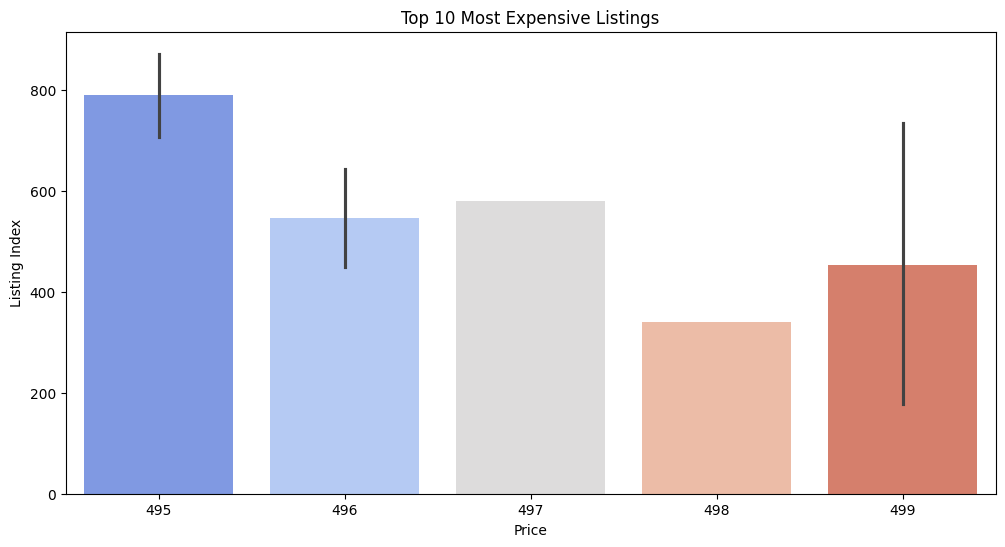

In [ ]:
# Get the top 10 most expensive listings
top_10_expensive = df.nlargest(10, 'price')

# Bar plot for top 10 most expensive listings
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y=top_10_expensive.index, data=top_10_expensive, palette='coolwarm')
plt.title('Top 10 Most Expensive Listings')
plt.xlabel('Price')
plt.ylabel('Listing Index')
plt.show()


### Visualization 8: Listings by Neighborhood (Countplot)


<ipython-input-20-579543e8ee84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood_group', data=df, palette='Set2')


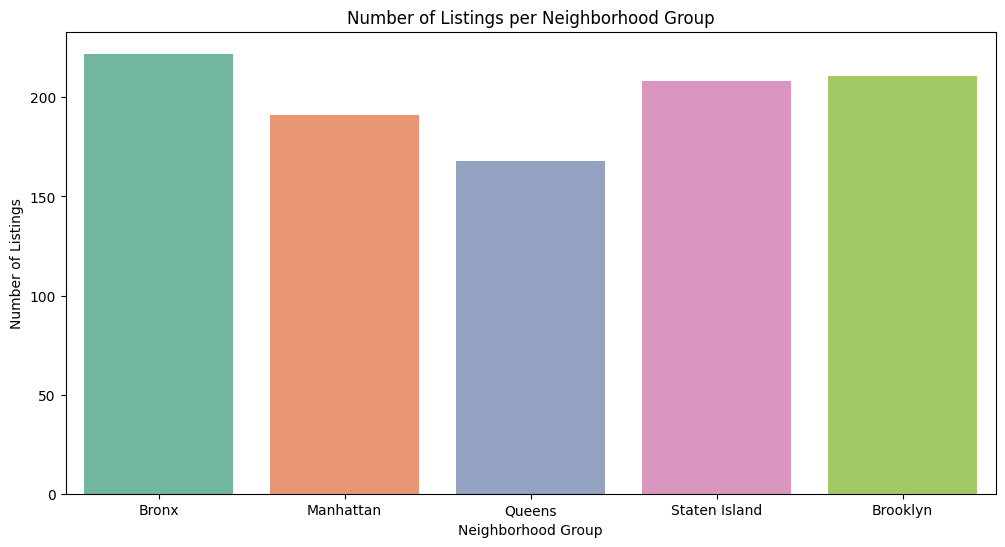

In [ ]:
# Countplot for number of listings per neighborhood group
plt.figure(figsize=(12, 6))
sns.countplot(x='neighbourhood_group', data=df, palette='Set2')
plt.title('Number of Listings per Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.show()


### Visualization 9: Average Price per Night by Neighborhood Group (Bar Plot)


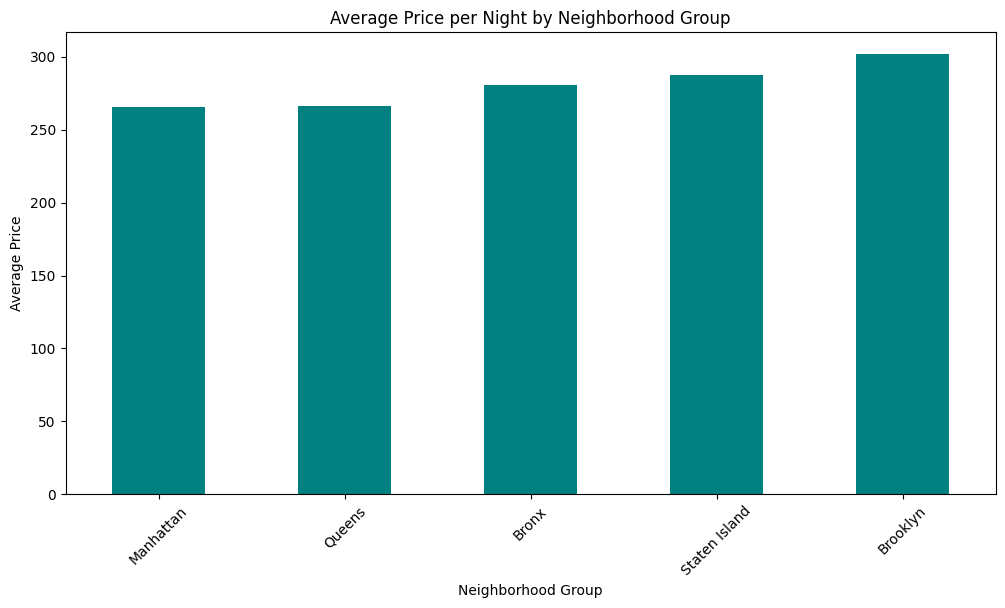

In [ ]:
# Calculate the average price per neighborhood group
avg_price_by_neighborhood = df.groupby('neighbourhood_group')['price'].mean().sort_values()

# Bar plot for average price by neighborhood
plt.figure(figsize=(12, 6))
avg_price_by_neighborhood.plot(kind='bar', color='teal')
plt.title('Average Price per Night by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


### Visualization 10: Review Count Distribution (Histogram)


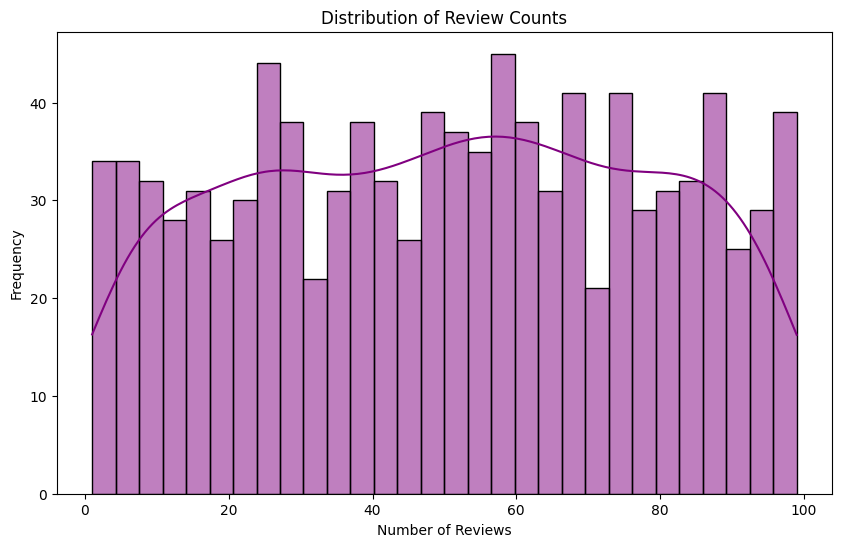

In [ ]:
# Histogram of number of reviews
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_reviews'], kde=True, color='purple', bins=30)
plt.title('Distribution of Review Counts')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()


### Visualization 11:  Correlation Matrix

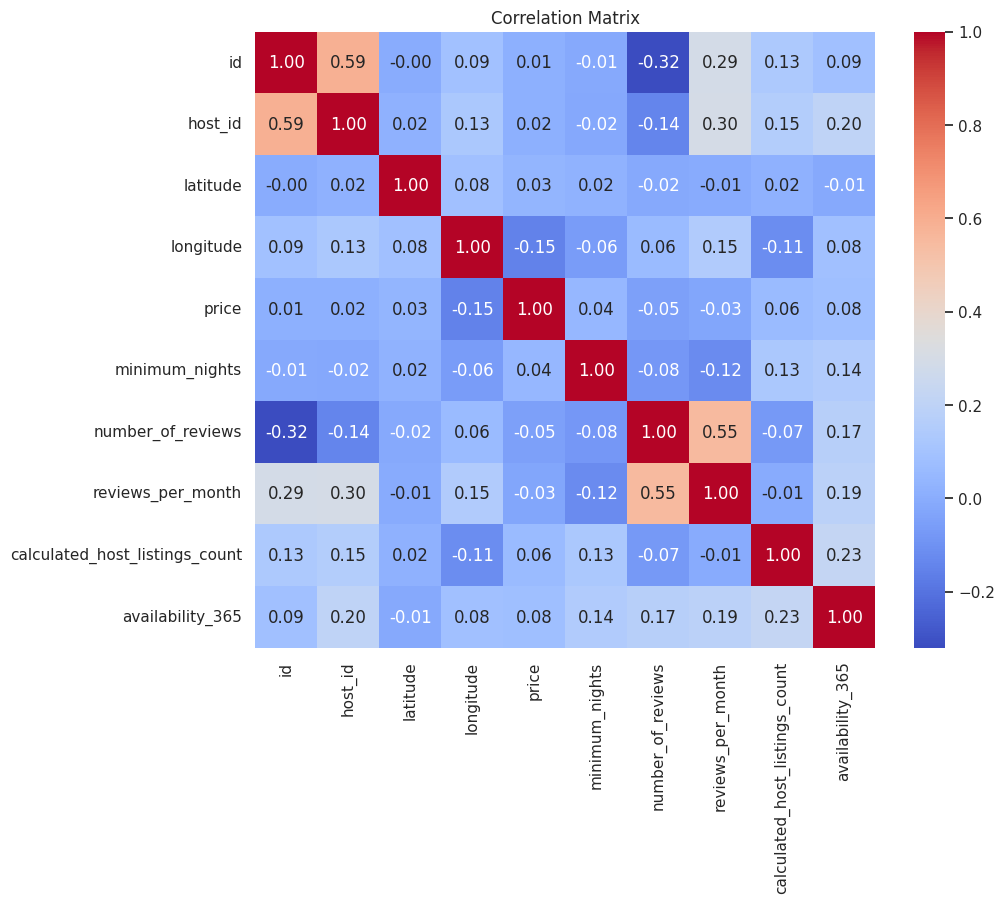

In [10]:
sns.set(style="whitegrid")


# Correlation Matrix


plt.figure(figsize=(10, 8))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Visualization 12:   Heatmap

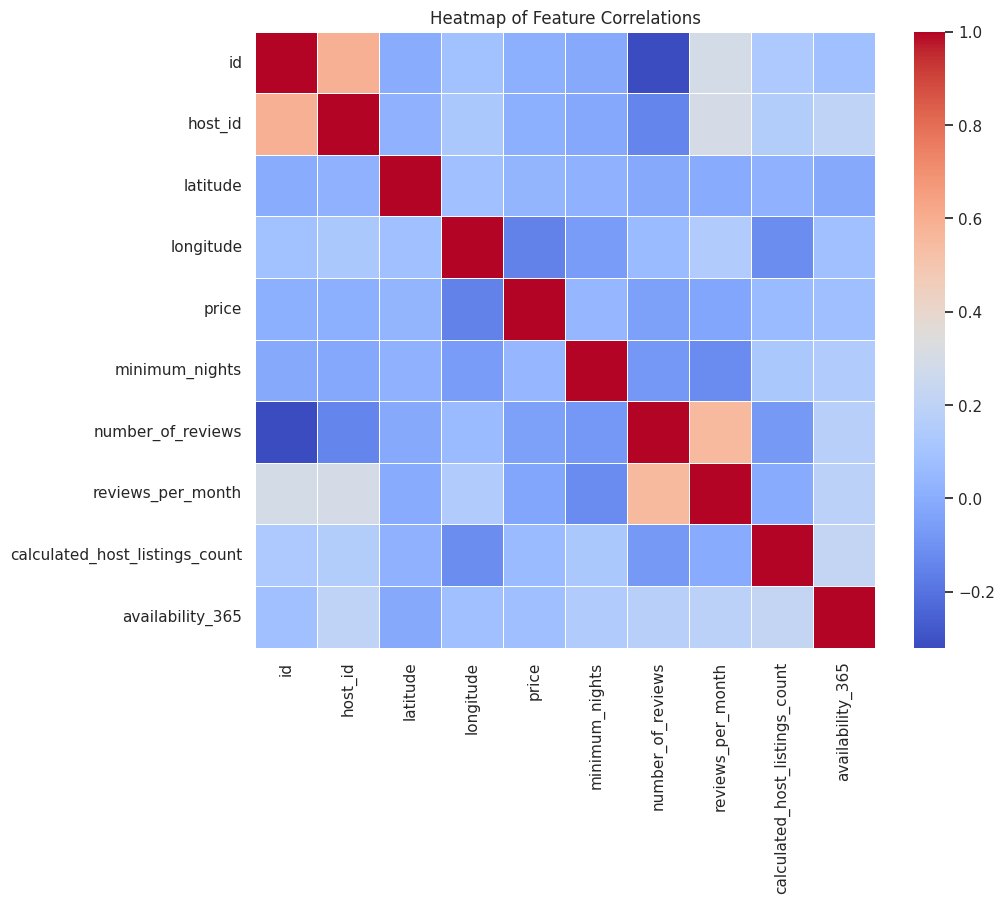

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

**Conclusion (Initial Observations)**

1. Diverse Market – Listings are spread across all boroughs, with Manhattan and Brooklyn being the most active areas.


2. Pricing Variability – Prices fluctuate significantly based on location, room type, and other factors, with Manhattan generally having higher prices.


3. Host Behavior – Some hosts have multiple listings, indicating professional property managers alongside individual hosts.


4. Review Trends – Listings with more reviews tend to have higher engagement, but many listings have zero or few reviews, which may affect demand.

5. Room Type Distribution – The dataset includes various room types, with "Entire home/apt" and "Private room" being the most common.

6. Availability Issues – Some listings have low availability or are listed for extreme minimum nights, which may indicate inactive or special-use listings.